# Sazonalidade

O coração do $prophet$.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('./data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


17:31:00 - cmdstanpy - INFO - Chain [1] start processing
17:31:00 - cmdstanpy - INFO - Chain [1] done processing


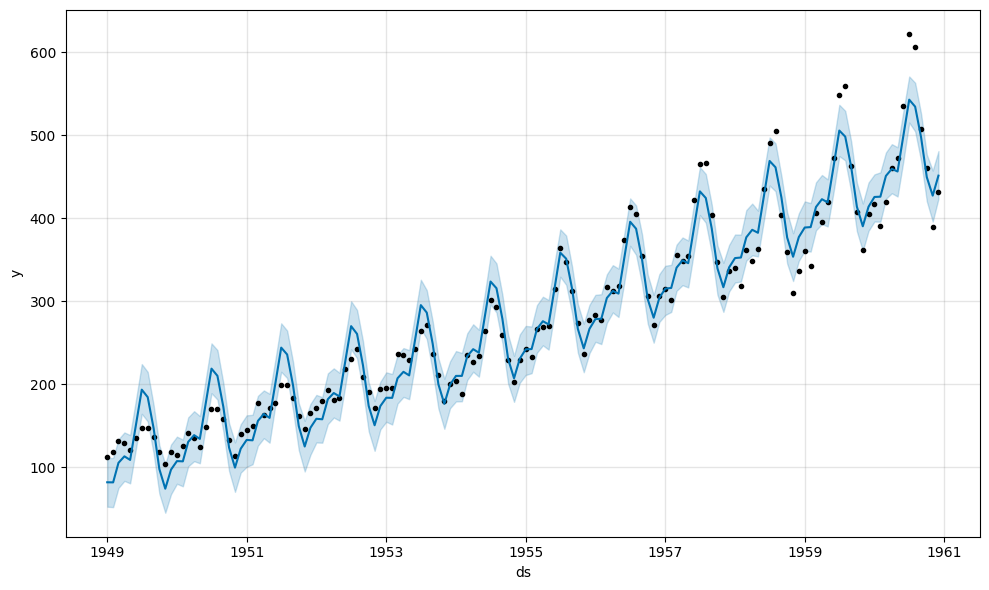

In [3]:
model_a = Prophet(seasonality_mode='additive', yearly_seasonality=4)
model_a.fit(df)
forecast_a = model_a.predict()
fig_a = model_a.plot(forecast_a)
plt.show()

17:31:00 - cmdstanpy - INFO - Chain [1] start processing
17:31:00 - cmdstanpy - INFO - Chain [1] done processing


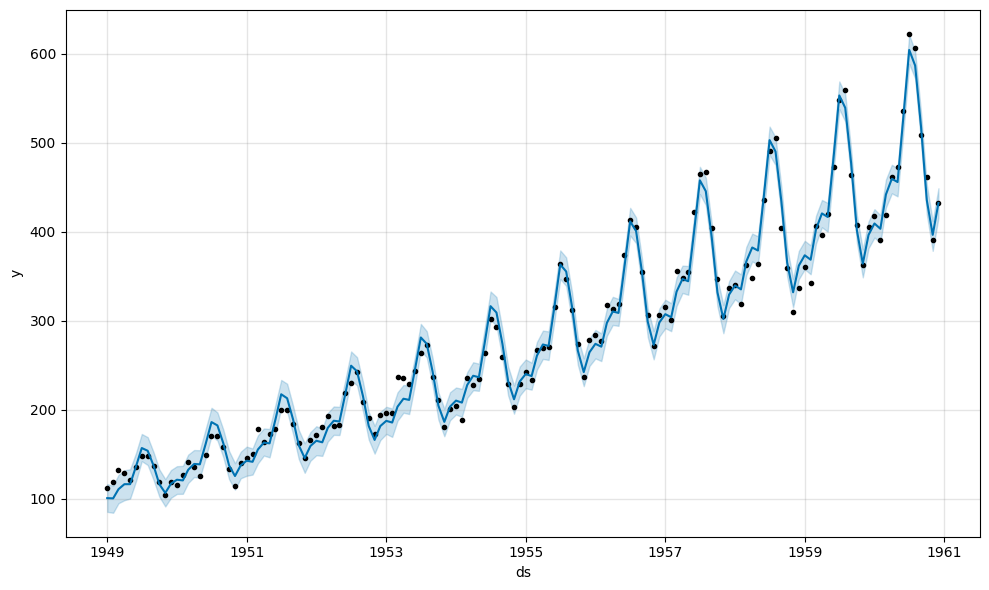

In [4]:
model_m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model_m.fit(df)
forecast_m = model_m.predict()
fig_m = model_m.plot(forecast_m)
plt.show()

In [5]:
forecast_m.head(3).T

,0,1,2
ds,1949-01-01 00:00:00,1949-02-01 00:00:00,1949-03-01 00:00:00
trend,111.737324,113.687588,115.449118
yhat_lower,85.021437,83.975527,94.686231
yhat_upper,116.16809,114.401275,126.563973
trend_lower,111.737324,113.687588,115.449118
trend_upper,111.737324,113.687588,115.449118
multiplicative_terms,-0.101204,-0.11911,-0.043247
multiplicative_terms_lower,-0.101204,-0.11911,-0.043247
multiplicative_terms_upper,-0.101204,-0.11911,-0.043247
yearly,-0.101204,-0.11911,-0.043247


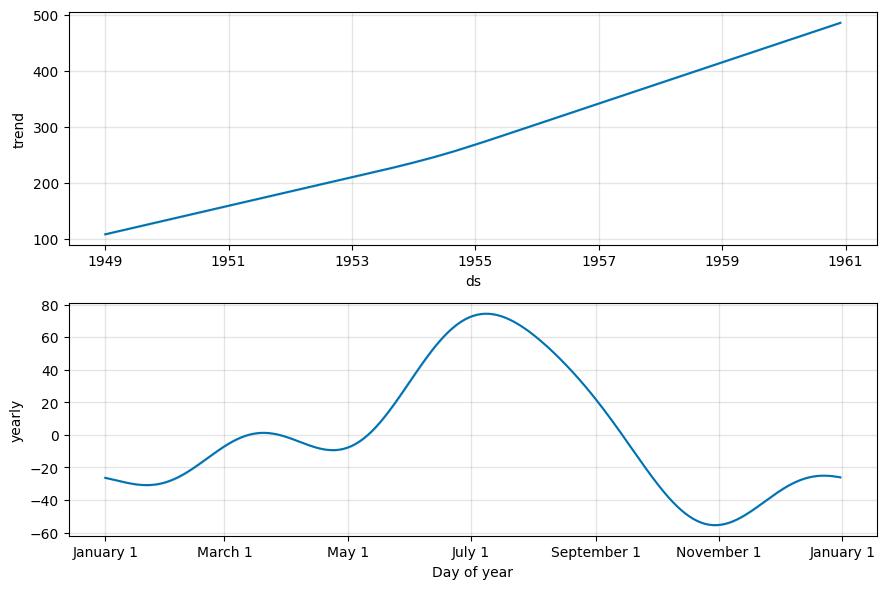

In [6]:
fig2_a2 = model_a.plot_components(forecast_a)
plt.show()

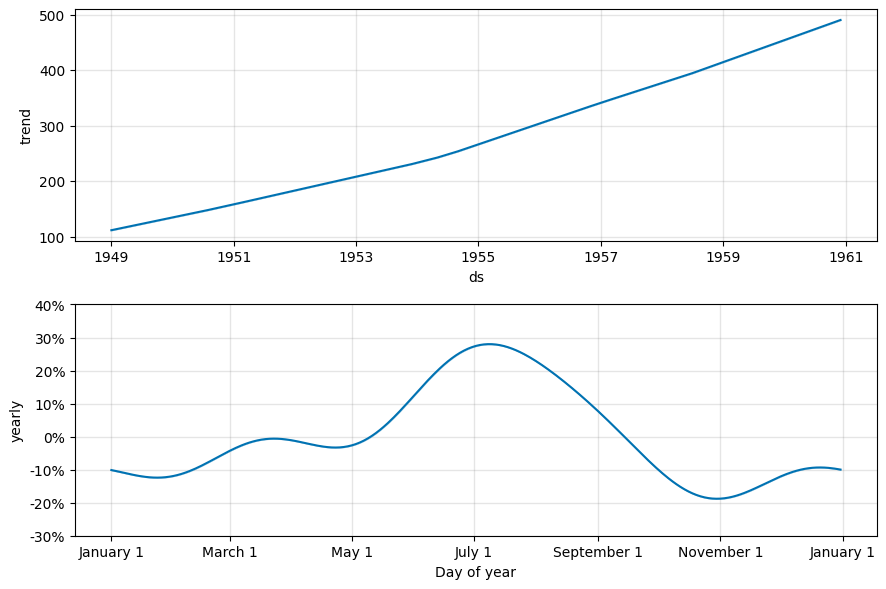

In [7]:
fig2_m = model_m.plot_components(forecast_m)
plt.show()

### Pag 68 - Dicas

Quando os dados representam uma contagem de dados no tempo, como a quantidade de passageiros, nós iremos geralmente usar a `sazonalidade multiplicativa`. Usar a sazonalidade aditiva, poderá causar valores preditos negativos.

In [8]:
df = pd.read_csv('./data/divvy_daily.csv')
df.head()

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow


Vamos usar o dados de temperatura e tempo no capítulo 8

In [9]:
df = pd.read_csv('./data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2014-01-01,95
1,2014-01-02,111
2,2014-01-03,6
3,2014-01-04,181
4,2014-01-05,32


17:31:01 - cmdstanpy - INFO - Chain [1] start processing
17:31:02 - cmdstanpy - INFO - Chain [1] done processing


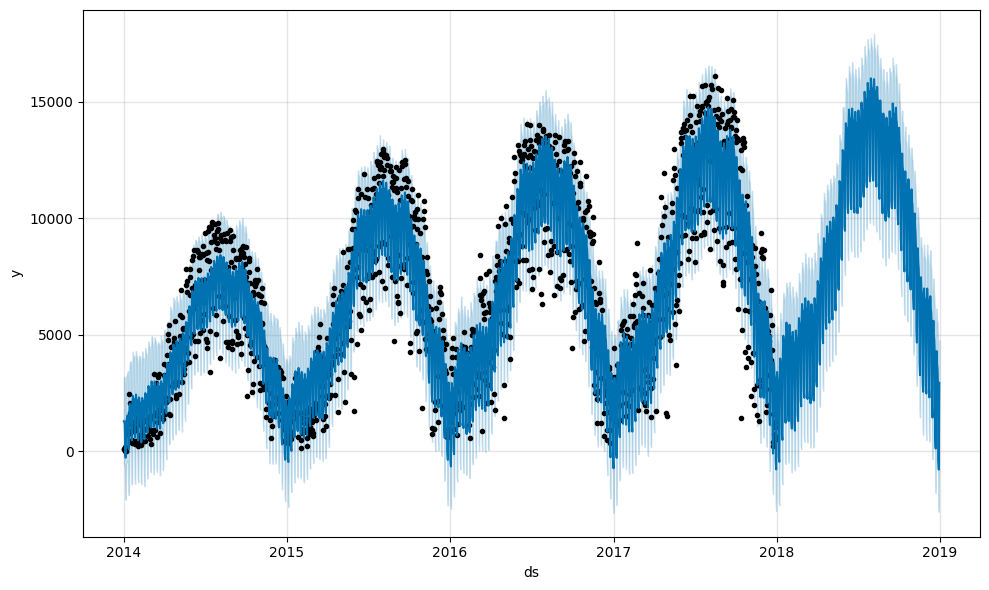

In [10]:
model = Prophet(seasonality_mode = 'multiplicative', yearly_seasonality='auto')
model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

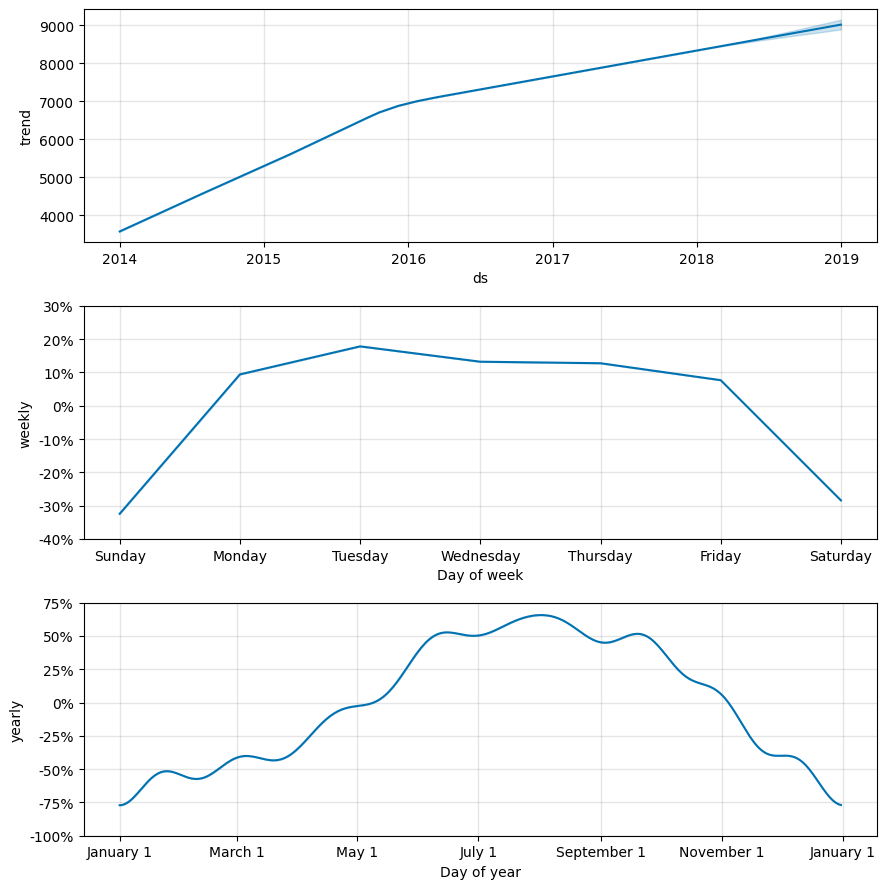

In [11]:
fig2 = model.plot_components(forecast)
plt.show()

### Controlando a sazonalidade com as ordens da série de Fourier

O parâmetro de sazonalidade altera a `flexibilidade` das curvas do anual, semanal e diário.

Compare as sazonalidade anuais entre os dois modelos (*anterior e posterior*)

17:31:03 - cmdstanpy - INFO - Chain [1] start processing
17:31:03 - cmdstanpy - INFO - Chain [1] done processing


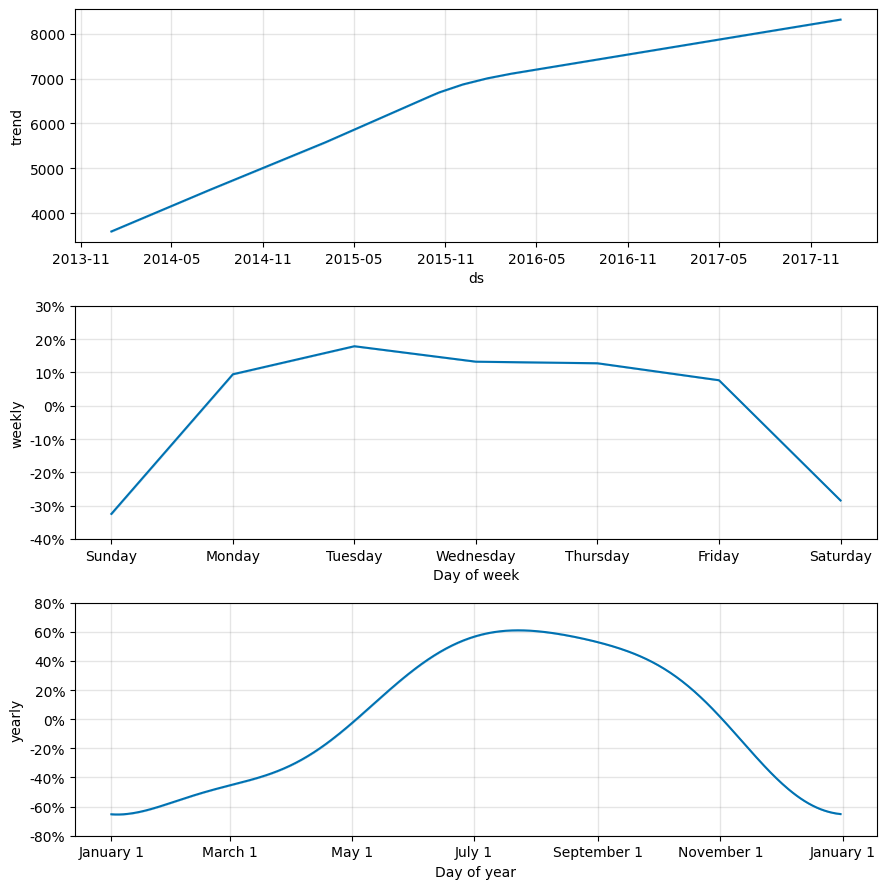

In [12]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model.fit(df)
forecast = model.predict()
fig3 = model.plot_components(forecast)
plt.show()

### Adicionando sazonalidade customizada



In [16]:
df = pd.read_csv('./data/sunspots.csv', usecols=['Date', 'Monthly Mean Total Sunspot Number'])
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']
df

,ds,y
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3247,2019-08-31,0.5
3248,2019-09-30,1.1
3249,2019-10-31,0.4
3250,2019-11-30,0.5


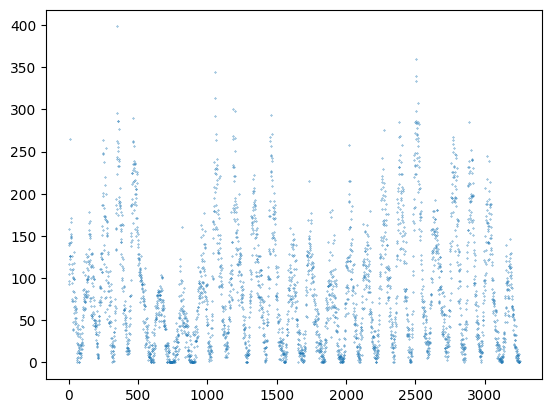

In [14]:
plt.plot(df.y, 'o', ms=0.3)
plt.show()

17:47:10 - cmdstanpy - INFO - Chain [1] start processing
17:47:10 - cmdstanpy - INFO - Chain [1] done processing


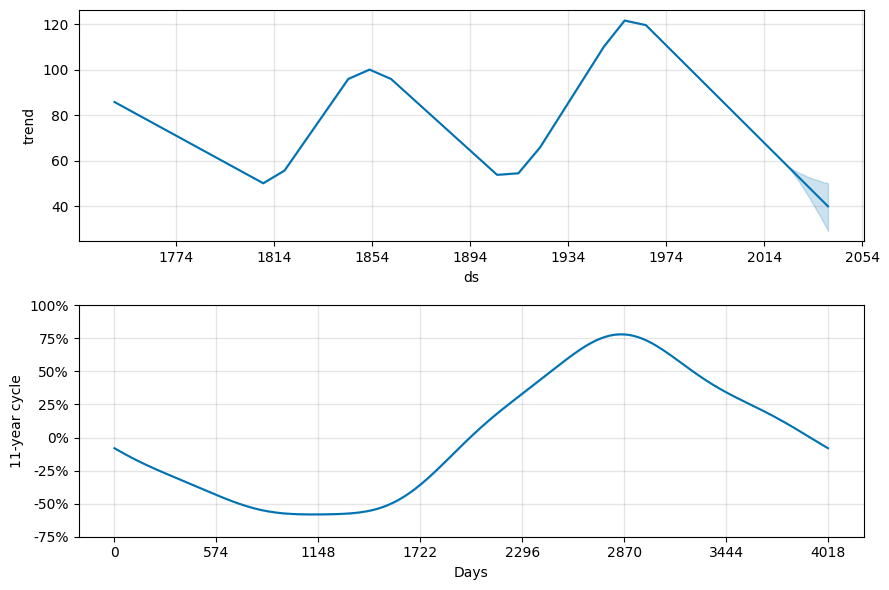

In [26]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=False)

# Adicionando sazonalidade customizada
model.add_seasonality(name='11-year cycle', period=11 * 365.25, fourier_order=5)

# ================================================================================================================
# Adicionando sazonalidade intra-diária (horaria)
"""model.add_seasonality(name='hourly', period=float(1/24), fourier_order=5)"""

# Adicionando sazonalidade trimestral (Quarter)
"""model.add_seasonality(name='quarter', period=365.24 / 4, fourier_order=5)"""  # Dividindo o ano em 4 partes (Trimestre)
# ================================================================================================================

model.fit(df)
future = model.make_future_dataframe(periods=240, freq='M')
forecast = model.predict(future)
fig = model.plot_components(forecast)
plt.show()

In [27]:
model.seasonalities

OrderedDict([('11-year cycle',
              {'period': 4017.75,
               'fourier_order': 5,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

### Adicionando sazonalidades condicionais

Nos dados diários dos alugueis de bikes, vimos que existem diferentes demandas as $8 a.m.$ e as $6 p.m.$ e diferentes comportamentos na semana e nos finais de semana.

Temos que desativar a sazonlidade semanal default e adicionar outras duas sazonalidades customizadas.

In [29]:
df = pd.read_csv('./data/divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2014-01-01 01:00:00,1
1,2014-01-01 02:00:00,9
2,2014-01-01 03:00:00,4
3,2014-01-01 04:00:00,1
4,2014-01-01 07:00:00,2


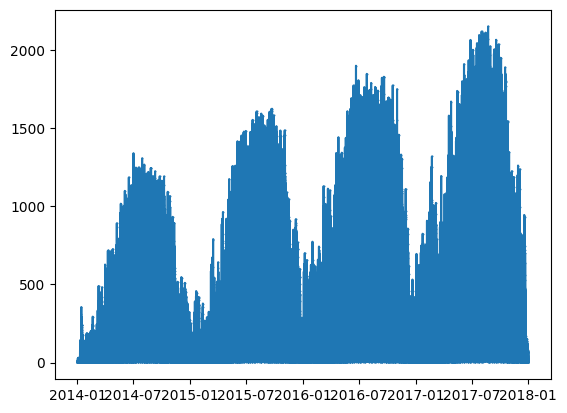

In [33]:
plt.plot(df.ds, df.y, ms=0.4, marker='o')
plt.show()

In [44]:
def is_weekend(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5 or date.dayofweek == 6)

In [45]:
df['weekend'] = df['ds'].apply(is_weekend)
df['weekday'] = ~df['ds'].apply(is_weekend)  # O operador ~ inverte o sinal booleano

df.head()

,ds,y,weekend,weekday
0,2014-01-01 01:00:00,1,False,True
1,2014-01-01 02:00:00,9,False,True
2,2014-01-01 03:00:00,4,False,True
3,2014-01-01 04:00:00,1,False,True
4,2014-01-01 07:00:00,2,False,True


In [51]:
#  Adicionando as sazonalidades condicionais diárias

model = Prophet(seasonality_mode='multiplicative',
               yearly_seasonality=6,  # Números que o autor julgou serem bons - Testando
               weekly_seasonality=6,  # Números que o autor julgou serem bons - Testando
               daily_seasonality=False  # Será utilizado sazonalidades diárias condicionais no lugar dessa.
               )

model.add_seasonality(name='daily_weekend',
                      period=1,
                      fourier_order=3,
                      condition_name='weekend'
                     )

model.add_seasonality(name='daily_weekday',
                      period=1,
                      fourier_order=3,
                      condition_name='weekday'
                     )
model.fit(df)

18:39:34 - cmdstanpy - INFO - Chain [1] start processing
18:40:00 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
#  Construindo os dados futuros
# =============================

future = model.make_future_dataframe(periods=365 * 24, freq='h')
future['weekend'] = future['ds'].apply(is_weekend)
future['weekday'] = future['ds'].apply(is_weekend)
forecast = model.predict(future)

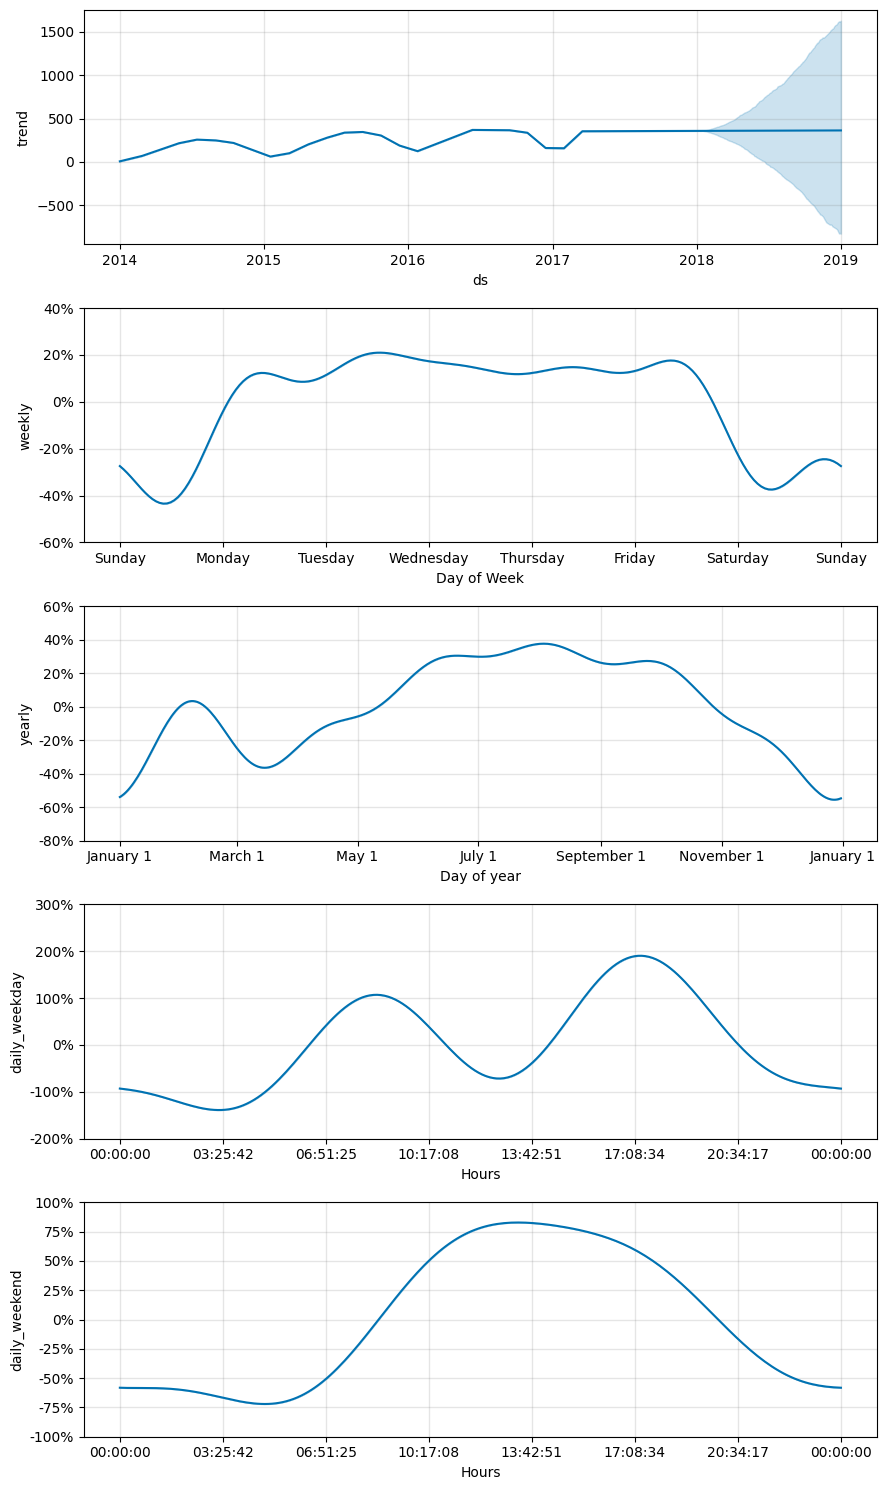

In [57]:
fig = model.plot_components(forecast)
plt.show()

### Regularização da sazonalidade

pag 86